In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

[[ 4  4  4]
 [10 10 10]
 [16 16 16]]


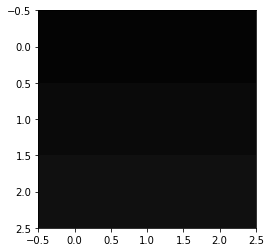

In [2]:
#가운데 거울이 있다고 생각하자. 빈값은 리플렉션되서 기록이 된다.

#opencv는 누락값이 0이 아니다.

kernel = np.array([[0, 0, 0],
                   [1, 0, 1],
                   [0, 0, 0]])

img = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype = "uint8")

#결과값은 항상, 원본 사이즈 크기만큼 나온다.

filtered = cv2.filter2D(img, -1, kernel)

print(filtered)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

In [3]:
"""
5 4 5 6 5
2 1 2 3 2
5 4 5 6 5
8 7 8 9 8
5 4 5 6 5
"""

'\n5 4 5 6 5\n2 1 2 3 2\n5 4 5 6 5\n8 7 8 9 8\n5 4 5 6 5\n'

[[0 0 0]
 [0 0 0]
 [0 0 0]]


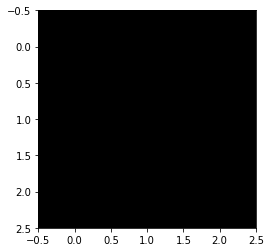

In [4]:
#가운데 거울이 있다고 생각하자. 빈값은 리플렉션되서 기록이 된다.

#opencv는 누락값이 0이 아니다.
#항상, 0이상, 255이하로만 나오게 되어있다. cliping 과정이 숨어있다.

kernel = np.array([[0, 0, 0],
                   [1, 0, -1],
                   [0, 0, 0]])

img = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype = "uint8")

#결과값은 항상, 원본 사이즈 크기만큼 나온다.

filtered = cv2.filter2D(img, -1, kernel)

print(filtered)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


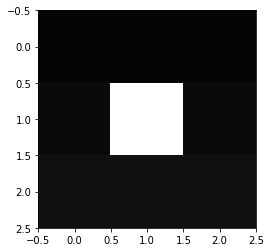

In [5]:
#가운데 거울이 있다고 생각하자. 빈값은 리플렉션되서 기록이 된다.

#opencv는 누락값이 0이 아니다.
#항상, 0이상, 255이하로만 나오게 되어있다. cliping 과정이 숨어있다.
#평균연산은 이런 문제가 발생하지 않는다.


kernel = np.array([[0, 0, 0],
                   [1, 0, 1],
                   [0, 0, 0]])

img = np.array([[1, 2, 3],
               [200, 5, 200],
               [7, 8, 9]], dtype = "uint8")

#결과값은 항상, 원본 사이즈 크기만큼 나온다.

filtered = cv2.filter2D(img, -1, kernel)

print(filtered)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

[[  0   2   0]
 [  0 100   0]
 [  0   2   0]]


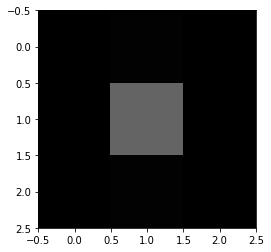

In [6]:
#가운데 거울이 있다고 생각하자. 빈값은 리플렉션되서 기록이 된다.

#opencv는 누락값이 0이 아니다.
#항상, 0이상, 255이하로만 나오게 되어있다. cliping 과정이 숨어있다.
#평균연산은 이런 문제가 발생하지 않는다.


kernel = np.array([[0, 0, 0],
                   [-1, 0, 1],
                   [0, 0, 0]])

img = np.array([[1, 2, 3],
               [100, 5, 200],
               [7, 8, 9]], dtype = "uint8")

#결과값은 항상, 원본 사이즈 크기만큼 나온다.

filtered = cv2.filter2D(img, -1, kernel)

print(filtered)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

In [7]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

img = np.array([
      [1,2,3],
    [200,5,200],
    [7,8,9]
], dtype="float")

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]
                  ])
filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


<img src = padding.jpg width = 100>

In [8]:
cv2.imwrite("output.png", filtered.astype('uint8'))
img = cv2.imread("output.png")
print(img)



[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


In [9]:
#np사용
ma = np.max(filtered)
mm = np.min(filtered)

n = (filtered - mm)/(ma - mm) * 255 # -2 ~ 0 -> 0 ~ 255
#
print(n)


n2 = np.abs(filtered)/np.max(np.abs(filtered)) * 255  # 0 ~ 2 -> 0 ~ 255
print(n2)


[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]


[[255   0 255]
 [255 255 255]
 [255   0 255]]


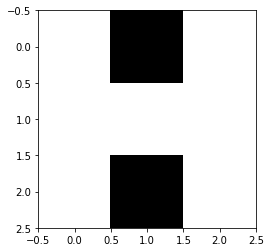

In [10]:
#다음을 알면, 쉽게 정규화 가능
norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

norm = norm.astype("uint8")

print(norm)
plt.imshow(cv2.cvtColor(norm, cv2.COLOR_BGR2RGB))

In [11]:
src = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
#가급적이면 float타입으로 해야 값이 정상적으로 나온다 uint8은 출력할때만
src2 = src.astype('int16')

kernel = np.array([[0, 1, 0],
                   [0, 0, 0],
                   [0, -1, 0]
                  ])

#가장 단순한 방법
filtered = cv2.filter2D(src2, -1, kernel) + 128
print(np.min(filtered))
print(np.max(filtered))
cv2.imwrite("output.png", filtered)

#정확한 방법(어떤것이든 0~255사이의 값으로 표현해준다.)
filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)
print(np.min(filtered2))
print(np.max(filtered2))
cv2.imwrite("output2.png", filtered2)
#plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

#회색부분은 사실 다 0이다. edge의 방향성까지 다 포함이 된다. 어두워지는 부분과 밝아지는 부분 모두 표시 된다.

AttributeError: 'NoneType' object has no attribute 'astype'

In [ ]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
#가급적이면 float타입으로 해야 값이 정상적으로 나온다 uint8은 출력할때만
src2 = src.astype('int16')

kernel = np.array([[0, 1, 0],
                   [0, 0, 0],
                   [0, -1, 0]
                  ])

#가장 단순한 방법
filtered = cv2.filter2D(src2, -1, kernel) + 128
print(np.min(filtered))
print(np.max(filtered))
cv2.imwrite("shape1.png", filtered)

kernel = np.array([[0, 0, 0],
                   [1, 0, -1],
                   [0, 0, 0]
                  ])

#정확한 방법(어떤것이든 0~255사이의 값으로 표현해준다.)
filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)
print(np.min(filtered2))
print(np.max(filtered2))
cv2.imwrite("shape2.png", filtered2)
#plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

#회색부분은 사실 다 0이다. edge의 방향성까지 다 포함이 된다. 어두워지는 부분과 밝아지는 부분 모두 표시 된다.

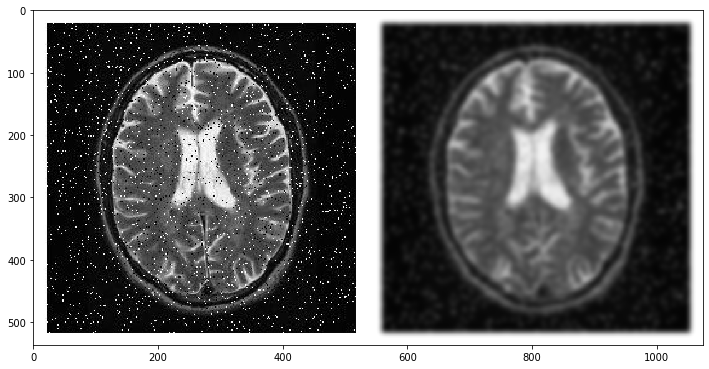

In [13]:
img = cv2.imread("brain.jpg")
gauss = cv2.GaussianBlur(img, (25, 25), 0)

plt.figure(figsize = (12, 12))
plt.imshow(np.hstack([img, gauss]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


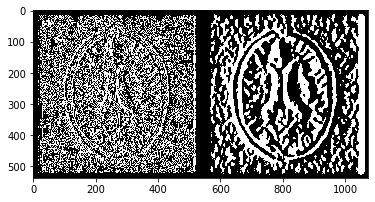

In [15]:
#-가 나올수 있기 때문에, 64F를 사용
out1 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
out2 = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize = 3)

plt.imshow(np.hstack([out1, out2]))

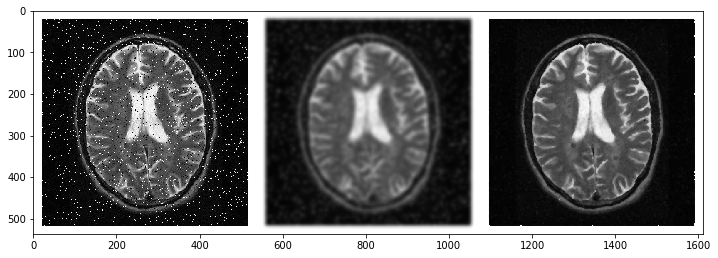

In [19]:
#미디안 필터 사용, 가운데 있는곳을 대표값으로 설정
#(중간값으로 설정)

median = cv2.medianBlur(img, 5)

plt.figure(figsize = (12, 12))
plt.imshow(np.hstack([img, gauss, median]))

#블러링은 고주파 성분을 죽이는것
#미디언은 중간값을 사용하기 때문에 남아있다.